# This notebook does the followings: 
1. Data Cleaning 
2. Exporting new data file ready for the analysis
3. EDA: Exploratory data analysis 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data')
master=pd.read_stata('vdsa_master_all_yrs.dta')  #importing data file
master=master[master['YEAR']>1965]
master.head()


Creating a new coloumn for fraction of total area dedicated to wheat cultivation. 

In [ ]:
master['wht_area_fraction']=master['WHT_TA']/master['tot_area']
master['rice_area_fraction']=master['RICE_TA']/master['tot_area']

In original dataset, if wheat is not grown in the region or is unknown, it is coded as negative, so we need t clean for it.

In [ ]:
master.loc[master["wht_area_fraction"] < 0] = 0
master.loc[master["wht_area_fraction"] > 1] = 1
master["wht_area_fraction"].describe()

In [ ]:
master.loc[master["rice_area_fraction"] < 0] = 0
master.loc[master["rice_area_fraction"] > 1] = 1
master["rice_area_fraction"].describe()

Generating a new dataframe of wheat growing districts. We select districts with wheat area as a fraction of total cultivated area being greater than a certain threshold. 


In [ ]:
threshold=0.2
master_wht=master[master["wht_area_fraction"] > threshold]
master_wht['STNAME'].value_counts()  #Looking at the frequency of states in new dataframe of wheat specialized region

In [ ]:
for col in master_wht.columns:
    print(col)                    #Listing the coloumns 

In [ ]:
master_wht=master_wht[['STCODE','STNAME','DIST', 'DISTNAME', 'YEAR',  'wht_yield', 'NPK_TC', 'tot_area',
                        'avg_yield_value', 'wht_yield_value', 'wht_price', 'CANALS', 'TUBEWELL','ANNUAL','JULAUGRF',
                        'wht_area_irrg_per','land_nonagri_per', 'mkt', 'wht_area_fraction','N_TC', 'P_TC','K_TC']]
master_wht.head()      
df=master_wht

NPK_TC is the total fertilizer used in tonnes (1000 kilograms). tot_area is the total area of district in '000 hectares. Therefore,  NPK_TC/tot_area gives us fertilizer use with unit kg/hetcare.

In [ ]:
master_wht['NPK_per_hect']=master_wht['NPK_TC']
master_wht=master_wht[master_wht['NPK_TC']>0]
master_wht=master_wht[master_wht['tot_area']>0]

In [ ]:
master_wht['NPK_per_hect']=master_wht['NPK_TC'] /master_wht['tot_area']


Exploratory Data Analyis

In [ ]:
ferti=master_wht['NPK_per_hect']  #generating a series 
ferti.describe()
p = ferti.plot(kind='hist', color='r', alpha=0.5)


In [ ]:
#Time trend in Fertilizer use
df=master_wht
df=df[df['YEAR']>1965]
df_ferti=df.groupby('YEAR')['NPK_per_hect'].mean()

p = plt.plot(df_ferti.index, df_ferti.values)
plt.legend()
plt.title('Average Fertilizer Use in Wheat Growing Region in India Over Time')
plt. xlabel("Calander Year")
plt. ylabel("Fertilizer use (kg/hetacre)")

Ordinary Least Squares: Linear Regression Implementation 

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X=master_wht['wht_yield']
y=master_wht['NPK_per_hect']

X2 = sm.add_constant(X)  #adding intercept 
est = sm.OLS(y, X2)   
est2 = est.fit()
print(est2.summary())  #we obtain model-statistics. Mainly interested in p-value and R-squared.

We see that p-value is 0.000. Therefore there is strong relationship between the fertilizer use and wheat yield from per unit land

In [ ]:
master_wht.to_csv('master_wht.csv')

#Analysis of Yield for Rice Growing Regions


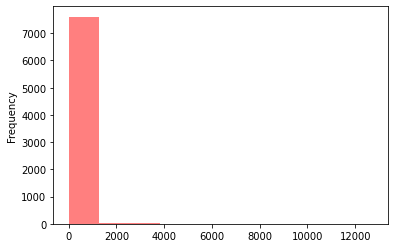

In [ ]:
threshold=0.2
master_rice=master[master["rice_area_fraction"] > threshold]
master_rice['STNAME'].value_counts()  #L

master_rice=master_rice[['STCODE','STNAME','DIST', 'DISTNAME', 'YEAR',  'rice_yield', 'NPK_TC', 'tot_area',
                        'avg_yield_value', 'rice_yield_value', 'rice_price', 'CANALS', 'TUBEWELL','ANNUAL','JULAUGRF',
                        'wht_area_irrg_per','land_nonagri_per', 'mkt', 'rice_area_fraction','N_TC', 'P_TC','K_TC']]
master_rice.head()      
df=master_rice

master_rice['NPK_per_hect']=master_rice['NPK_TC']
master_rice=master_rice[master_rice['NPK_TC']>0]
master_rice=master_rice[master_rice['tot_area']>0]

master_rice['NPK_per_hect']=master_rice['NPK_TC'] /master_rice['tot_area']

ferti=master_rice['NPK_per_hect']  #generating a series 
ferti.describe()
p = ferti.plot(kind='hist', color='r', alpha=0.5)


In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X=master_rice['rice_yield']
y=master_rice['NPK_per_hect']

X2 = sm.add_constant(X)  #adding intercept 
est = sm.OLS(y, X2)   
est2 = est.fit()
print(est2.summary())  #we obtain model-statistics. Mainly interested in p-value and R-squared.

                            OLS Regression Results                            
Dep. Variable:           NPK_per_hect   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     708.0
Date:                Sun, 21 Aug 2022   Prob (F-statistic):          2.67e-149
Time:                        23:11:22   Log-Likelihood:                -57099.
No. Observations:                7697   AIC:                         1.142e+05
Df Residuals:                    7695   BIC:                         1.142e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -79.2510      9.948     -7.967      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
master_rice.to_csv('master_rice.csv')